# BORRADOR: ANÁLISIS DE FUGA DE EMPLEADOS EN UNA EMPRESA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('AbandonoEmpleados.csv', sep =';', index_col = 'id', na_values ='#N/D')
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# Fase de Business Analytics
**Objetivo**: encontrar insights

**Pasos**: análisis de calidad de los datos --> análisis de nulos --> análisis exploratorio de datos (EDA)--> análisis y generación de insights

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [20]:
#Conteo de valores nulos en las variables ordenados de manera descendiente
data.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [21]:
#eliminación de variables anos_en_puesto y conciliacion por exceso de valores nulos
data.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

In [22]:
data.isna().sum().sort_values(ascending = False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
mayor_edad                    0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
estado_civil                  0
num_empresas_anteriores       0
salario_mes                   0
abandono                      0
puesto                        0
nivel_laboral                 0
satisfaccion_entorno          0
empleados                     0
carrera                       0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

### Análisis EDA de variables categóricas

In [23]:
from math import floor

def graficos_eda_categoricos(var_cat):
    
    #Calculamos el número de filas que necesitamos (son 14 filas de tipo str)
    #vemos la forma que tiene nuestro df, pero solo de las columnas, las que a su vez dividimos por dos para poder
    #obtener la cantidad de columnas que cumplen esta condicion
    filas = floor(var_cat.shape[1] / 2)

    #Definimos el gráfico
    fig, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (20, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(var_cat):
        var_cat[variable].value_counts().plot.barh(ax = ax[cada], color = 'navy')
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

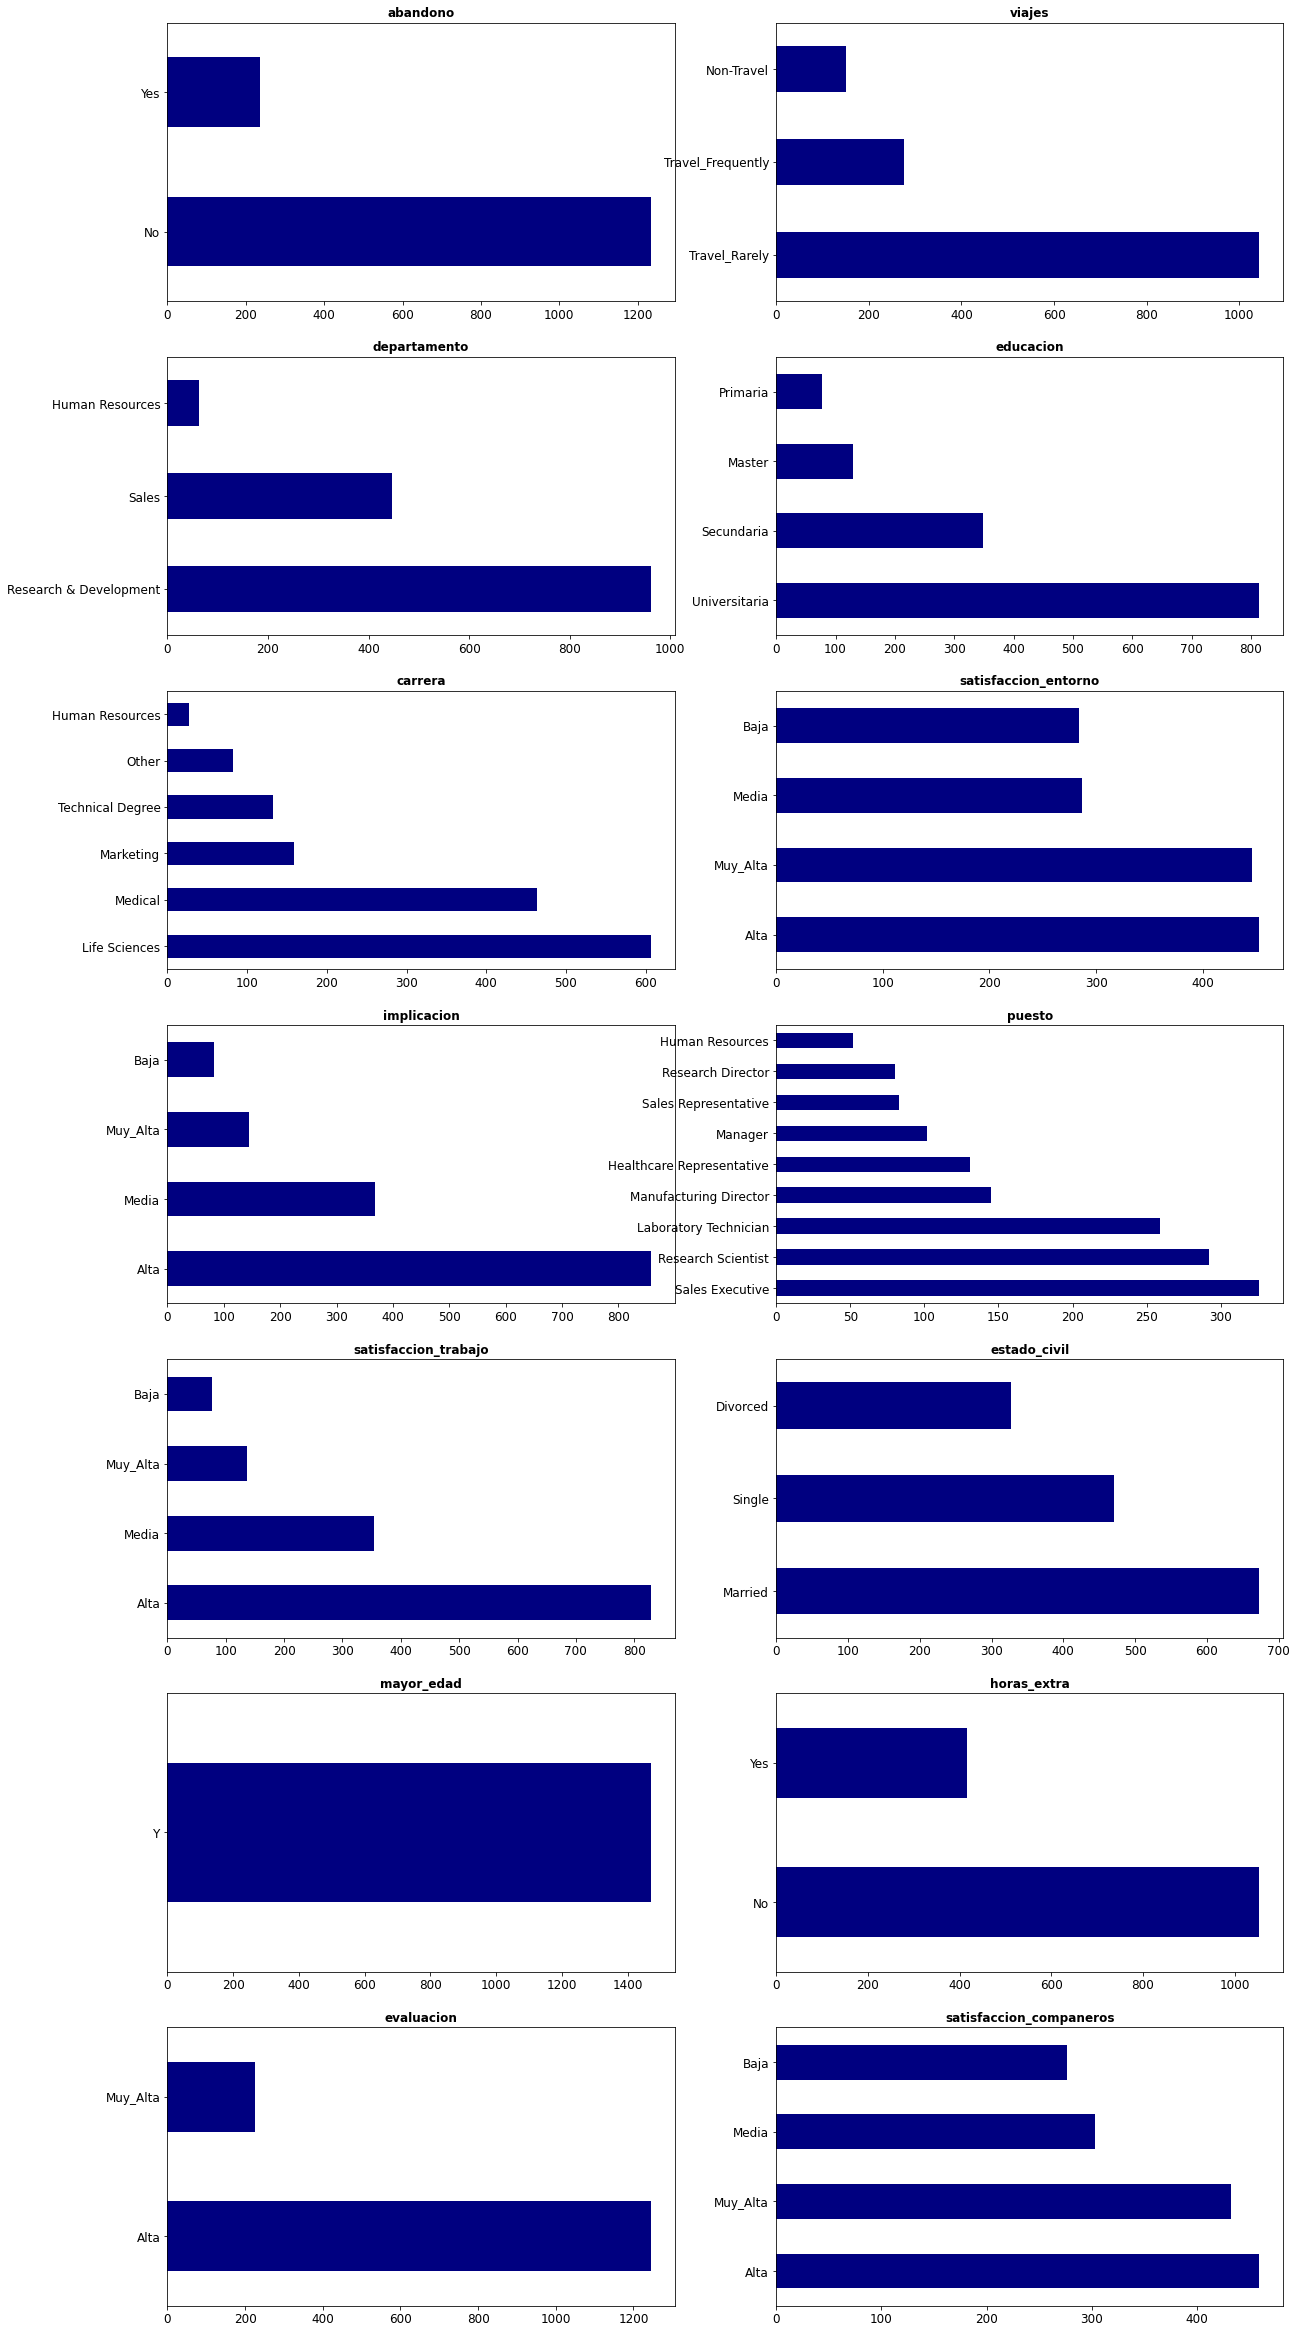

In [24]:
graficos_eda_categoricos(data.select_dtypes(include = 'O')) #otra opcion ...(data.select_dtypes(object))

In [25]:
#eliminación de la columna edad por ser una constante
#imputamos los valores NaN de las variables educacion (por 'Universitaria'), satisfaccion_trabajo(por 'Alta') e implicación (por 'Alta')

data.drop(columns = 'mayor_edad', inplace = True)
data['educacion'] = data['educacion'].fillna('Universitaria')
data['satisfaccion_trabajo'] = data['satisfaccion_trabajo'].fillna('Alta')
data['implicacion'] = data['implicacion'].fillna('Alta')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1470 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1470 non-null   object 
 14  estado_c

### Análisis EDA de variables numéricas

In [27]:
# Análisis y observación de las variables cuantitativas

def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [29]:
estadisticos_cont(data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


**Observaciones:** 
- Edad media de los empleados: 37 años
- Mediana: 36 años (Como la mediana es similar a la media, probablemente sea una variable con una distribucion normal/gaussiana
- Desviacion tipica: 9 (si la media es 37, la desviacion tipica nos indica que la mayoria de los empleados se encuentran entre los 29 y 45 años.
- Mínimo: 18 años
- Máximo: 60 años
- Percentiles: el 50% de los empleados tienen entre 30 y 43 años. 
- La variable empleados solo tiene un valor, no es una variable sino una constante, por ende debe eliminarse.
- La variable sexo tiene 4 valores, como de momento, no sabemos a que se deben estos 4 valores debemos eliminarla. No podemos interpretarla y tampoco imputarla, por ende se debe eliminar.
- La variable horas_por_quincena solo tiene un valor y como no nos aporta informacion debe eliminarse.

In [30]:
#Eliminamos las columnas de empleados, sexo y horas_quincena
data.drop(columns = ['empleados', 'sexo', 'horas_quincena'], inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

## Fase de generación de insights --- Análisis de Business Analytics - (preguntas semilla y tasa de abandono)

**Cuantificación del problema:¿Cual es la tasa de abandono?**

In [32]:
#Cuantificamos la variable abandono porcentualmente
data['abandono'].value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

**Observaciones:** notamos que sobre el porcentaje total de empleados, solo el 16% de empleados ha abandonado la empresa. El 83% de empleados aún permanece en la misma.

**¿Hay un perfil tipo de empleado que deja la empresa?**

Hacemos un análisis de penetración consistente en tomar la variable target y analizarla paso a paso con el resto de variables que nos sean útiles para encontrar info relevante. Antes debemos recodificar la variable abandono para poder hacer la media de esa variable con valores 0 - 1 y poder obtener un resultado en %. 

In [33]:
# Transformamos la variable abandono a numérica
data['abandono'] = data.abandono.map({'No':0, 'Yes':1})

In [34]:
#Función que se encarga de realizar un gráfico por cada columna que se proporcione seguido del titulo que se le asignará a dicho gráfico
#Agrupamos por la columna que se proporcione como argumento del parametro de la funcion, teniendo en cuenta para ello
#la media de la columna abandono analizada porcentualmente. 

def analisis_variable (columna, titulo_plt):
    analisis = data.groupby(columna).abandono.mean().sort_values(ascending = False) * 100
    analisis.plot.bar(color = 'navy');
    plt.title(titulo_plt)

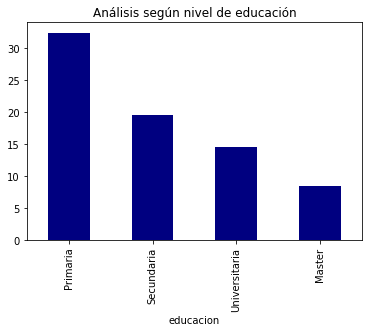

In [35]:
# Analisis por educación
analisis_variable('educacion', 'Análisis según nivel de educación')

**Observaciones:** encontramos que los empleados que alcanzaron un nivel de educación primario propiciaron el incremento de la tasa de abandonos en un 32,5% aproximadamente. Analizando el extremo opuesto deducimos que los empleados que han alcanzado un nivel de educación superior no han tenido tanta incidencia en la tasa de abandonos como si lo han tenido los de educacion primaria, en este caso la tasa de abandono de estos no llegó al 10%. 
**Tendencia**: a menor alcance de niveles educativos mayor posibilidad de que un empleado abandone la empresa. Cuanto mas educacion tiene un empleado menor riesgo de que este abandone la empresa. 

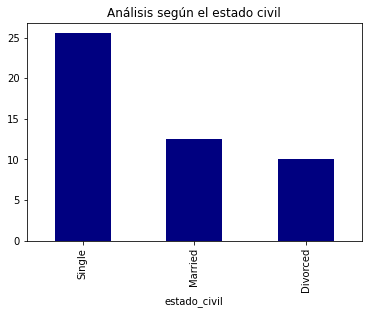

In [36]:
# Analisis por estado civil
analisis_variable('estado_civil', 'Análisis según el estado civil')

**Observaciones:** notamos que la mayor tendencia de abandono desde el punto de vista del estado civil de un empleado reside en aquellos que son solteros. Los casados y divorciados tienden a permanecer. 

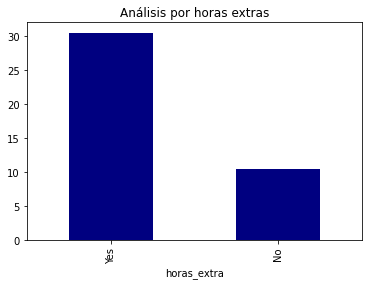

In [37]:
# Analisis por horas extras
analisis_variable('horas_extra', 'Análisis por horas extras')

**Observaciones:** los empleados que realizan horas extras tienen tendencia a abandonar la empresa. 

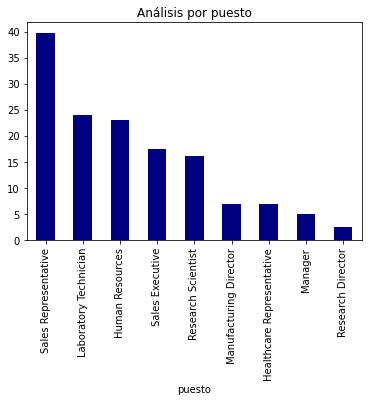

In [38]:
# Analisis por puesto
analisis_variable('puesto', 'Análisis por puesto')

**Observaciones:** apreciamos que desde el sector de representantes de ventas (40%) es donde tenemos mayor fuga de empleados. Mientras que por ejemplo, los directores de investigacion tienen una rotación practicamente tendiendo a 0.

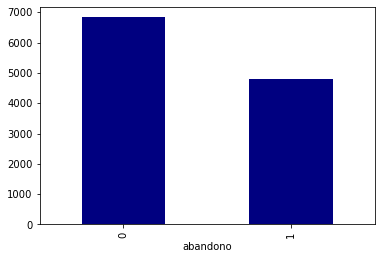

In [39]:
#análisis según abandono 
ana_aban = data.groupby('abandono').salario_mes.mean()
ana_aban.plot.bar(color = 'navy');

**Observaciones** no aplicamos la función que veniamos utilizando para los demás análisis. En este caso estamos haciendo una comparacion con otra variable que tambien es numerica (salario_mes), por ende lo que se hace es invertir la variable (pasamos como argumento de la funcion groupby la columna de abandono). Esto significa que agrupamos de acuerdo a si el empleado se ha ido o no de la empresa y lo que calculamos es la media del salario.

Como resultado obtenemos que el salario_mes es mayor en aquellos empleados que no se han ido de la empresa de los que si se han ido de la empresa. (O sea, los que ganan mas se van menos, en contraste con los que ganan menos).

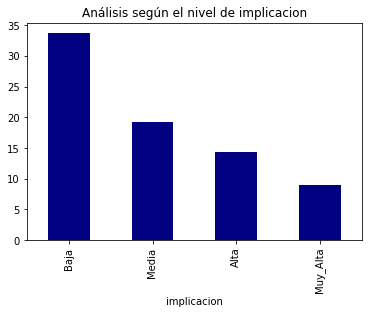

In [40]:
#Análisis según el nivel de implicación
analisis_variable('implicacion', 'Análisis según el nivel de implicacion')

**Observaciones:** Se aprecia que los empleados que tienen bajo nivel de implicación tienden a abandonar la empresa.

**Conclusiones de los análisis efectuados:** el perfil medio del empleado que deja la empresa es:

- De bajo nivel educativo
- Soltero
- Pertenece al sector de ventas
- Tiene un salario bajo en comparación con otros
- Su nivel de implicación dentro de la empresa es bajo, y
- Tiene alta carga de horas extras. 

## Estimación del impacto económico

**Análisis Business Case:**  partiendo de la tasa de abandono de empleados y del numero de empleados que tiene la empresa, cuantificamos el número de empleados que probablemente se vayan cada año de la misma. Para hacer esto, nos falta estimar el costo respecto a ¿cuanto cuesta que un empleado se vaya de la empresa? 

Datos a tener en cuenta para realizar el business case conforme al estudio "Cost of Turnover" del Center for American Progress:(con estos datos externos calculamos el coste que nos supone este problema anualmente): 
- *El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario*
- *El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario*
- *El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario*
- *El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario*


In [41]:
# Creamos una nueva variable salario_ano del empleado
data['salario_ano'] = data.salario_mes.transform(lambda x: x*12)
data[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [43]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(data['salario_ano'] <= 30000),
               (data['salario_ano'] > 30000) & (data['salario_ano'] <= 50000),
               (data['salario_ano'] > 50000) & (data['salario_ano'] <= 75000),
               (data['salario_ano'] > 75000)]

#Lista de resultados
resultados = [data.salario_ano * 0.161, data.salario_ano * 0.197, data.salario_ano * 0.204, data.salario_ano * 0.21]
                
#Aplicamos select
data['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


### ¿Cúanto ha costado este problema en el último año?

In [44]:
#Creamos una variable que calcule, sobre la base de aquellos empleados que hayan abandonado la empresa, la suma 
#total del impacto economico para la empresa en el ultimo año
coste_total = data.loc[data.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

**Observaciones:** apreciamos que la tasa del 16% de fuga de empleados es un problema que le ha costado a la empresa, en el ultimo año, unos $2719005.912

### **¿Cúanto le está costando a la empresa que la fuga de empleados esté ocurriendo en particular por la falta de motivacion al momento de trabajar?** 

In [45]:
#Analizamos el abandono de empleados respecto del nivel de implicación de estos en la empresa

data.loc[(data.abandono == 1) & (data.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

**Observaciones:** los empleados que se han retirado el último año de la empresa por la falta de implicación generó un coste economico para la empresa de $368672.688

## Creación de escenarios de ahorro 
**¿Cuanto dinero podemos ahorrar fidelizando mejor a los empleados?**

**RECORDAR:**

- **Cuantificación del problema:** el 16 % de los empleados se estan yendo anualmente de la empresa.
- **Cuantificación del impacto económico del problema:** la fuga de los empleados supone a la empresa un coste de reposición de personal de 2,7 millones de euros anuales.
-  **Estimación -escenarios- para la resolución del problema:** como el problema es de costes, la idea es entender cuanto podemos ahorrar de esos 2,7 millones de euros. 

Al realizar la estimacion se deben plantear 3 escenarios posibles en torno a las acciones de fidelización: 
- 1) **Escenario esperable**: reducir un 20% la fuga de empleados.
- 2) **Escenario positivo**: reducir en un 30% la fuga de empleados.
- 3) **Escenario negativo**: reducir un 10% esa fuga de empleados.

In [46]:
#Haciendo uso de la variable coste total multiplicamos ese coste por cada uno de los escenarios posibles de abordar

print(f"Reducir un 10% la fuga de empleados supone un ahorro para la empresa de $ {int(coste_total * 0.1)} por año.")
print(f"Reducir un 20% la fuga de empleados supone un ahorro para la empresa de $ {int(coste_total * 0.2)}  por año.")
print(f"Reducir un 30% la fuga de empleados supone un ahorro para la empresa de $ {int(coste_total * 0.3)} por año.")

Reducir un 10% la fuga de empleados supone un ahorro para la empresa de $ 271900 por año.
Reducir un 20% la fuga de empleados supone un ahorro para la empresa de $ 543801  por año.
Reducir un 30% la fuga de empleados supone un ahorro para la empresa de $ 815701 por año.


## Análisis del sector representantes de ventas

Como se aprecia que desde este sector surgen los empleados que más abandonan la empresa, hacemos un análisis más profundo sobre el mismo. 

In [47]:
#Cálculo del % de representantes de ventas que se han ido el año pasado de la empresa

total_repres_pasado = len(data.loc[data.puesto == 'Sales Representative'])
abandonos_repres_pasado = len(data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 1)])
porc_abandono_pasado = abandonos_repres_pasado / total_repres_pasado

print(f'El porcentaje de representantes de ventas que se han ido el año pasado de la empresa es del {porc_abandono_pasado} %.')

El porcentaje de representantes de ventas que se han ido el año pasado de la empresa es del 0.39759036144578314 %.


In [48]:
#¿Cuantos empleados de este sector dejarán la empresa este año a modo estimativo? 
# Esto lo evaluamos aplicando ese 40% sobre los empleados comerciales que todavía no se han ido de la empresa.

total_repres_actuales = len(data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 0)])
abandono_probable = int(total_repres_actuales * porc_abandono_pasado)

print(f'El abandono probable respecto al sector de representantes de ventas es de {abandono_probable} empleados.')

El abandono probable respecto al sector de representantes de ventas es de 19 empleados.


In [49]:
#¿Cúal es el impacto económico esperado de estos 19 empleados en concreto?
#Tomamos los empleados que actualmente pertencen a este sector y que no se han ido para hacer finalmente la suma del impacto_abandono
#Sobre ellos evaluamos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer en términos de ahorro.

retenemos = int(abandono_probable * 0.3)

ahorramos = data.loc[(data.puesto == 'Sales Representative') & (data.abandono == 0),'impacto_abandono'].sum() * porc_abandono_pasado * 0.3
ahorramos = round(ahorramos, 2)

print(f'Podemos retener {retenemos} representantes de ventas, lo que supone una capacidad de ahorro de $ {ahorramos}')

Podemos retener 5 representantes de ventas, lo que supone una capacidad de ahorro de $ 37447.22


**Observaciones:** con este dato podemos determinar el presupuesto para acciones de retención por departamento o perfil.
Si se logran retener 5 empleados del sector analizado puede usarse ese ahorro de $37.000 sólo en acciones específicas para
retener a los representantes de ventas y se estarían pagando sólas con la pérdida evitada.

# FASE DE MACHINE LEARNING

**OBJETIVOS:** creación de un sistema automático que sea capaz de encontrar los patrones subyacentes en los datos y predecir que empleados concretos estan en riesgo de dejar la empresa.

- **FASE 1**: entrenamiento del modelo.
- **FASE 2**: predicción y validación.
- **FASE 3**: interpretación del modelo.
- **FASE 4**: explotación del modelo - guarda del modelo para su utilización a futuro. 

In [50]:
#Copia del dataset porque hay que hacer ciertos cambios sobre las variables para que puedan funcionar en los modelos de ML
#El dataframe original (data), destinado a análisis de negocios y la copia (data_ml), destinada para ML

data_ml = data.copy()
data_ml

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [52]:
data.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual',
       'salario_ano', 'impacto_abandono'],
      dtype='object')

In [53]:
# Codificamos los datos categóricos a numéricos
from sklearn.preprocessing import OneHotEncoder

cat = data_ml.select_dtypes(include = 'O')
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

#Armamos el dataframe final para trabajar con ML
num = data.select_dtypes(include = 'int').reset_index(drop = True)

#Juntamos el dataframe cat_ohe con num
data_ml = pd.concat([cat_ohe,num], axis = 1)
data_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,5993,8,11,0,8,0,6,0,5,71916
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,5130,1,23,1,10,3,10,1,7,61560
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2090,6,15,0,7,3,0,0,0,25080
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2909,1,11,0,8,3,8,3,0,34908
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3468,9,12,1,6,3,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2571,4,17,1,17,3,5,0,3,30852
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,9991,4,15,1,9,5,7,1,7,119892
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6142,1,20,1,6,0,6,0,3,73704
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5390,2,14,0,17,3,9,0,8,64680


In [54]:
data_ml.columns

Index(['viajes_Non-Travel', 'viajes_Travel_Frequently', 'viajes_Travel_Rarely',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'educacion_Master', 'educacion_Primaria',
       'educacion_Secundaria', 'educacion_Universitaria',
       'carrera_Human Resources', 'carrera_Life Sciences', 'carrera_Marketing',
       'carrera_Medical', 'carrera_Other', 'carrera_Technical Degree',
       'satisfaccion_entorno_Alta', 'satisfaccion_entorno_Baja',
       'satisfaccion_entorno_Media', 'satisfaccion_entorno_Muy_Alta',
       'implicacion_Alta', 'implicacion_Baja', 'implicacion_Media',
       'implicacion_Muy_Alta', 'puesto_Healthcare Representative',
       'puesto_Human Resources', 'puesto_Laboratory Technician',
       'puesto_Manager', 'puesto_Manufacturing Director',
       'puesto_Research Director', 'puesto_Research Scientist',
       'puesto_Sales Executive', 'puesto_Sales Representative',
       'satisfaccion_trabajo_Alta', 'sati

## Diseño de la modelización

- Separamos las variables predictoras y la target
- Variable a predecir (target) = abandono de empleados

**Tener en cuenta:** debemos separar entre variables predictoras y aquella a predecir porque la idea es utilizar a futuro, cuando el modelo ya este construido, la informacion que ya conocemos (las variables predictoras) para intentar predecir que es lo que va a pasar con la variable target. Esto quiere decir que no sabemos por el momento la prediccion de la variable target, pero si tenemos información de las variables predictoras (sabemos si el empleado hace horas extras, si viaje, etc), por ende con el entrenamiento de estas ultimas podemos generar la prediccion de la variable target. 

In [55]:
#Separamos los datos en conjunto de entrenamiento y conjunto de test
#X son las variables predictoras, y es la variable a predecir
#Con el método drop eliminamos la variable abandono del dataset df_ml, quedándonos solamente las variables predictoras
#la variable target la separamos e introducimos en y

X = data_ml.drop(columns= ['abandono'])
y = data_ml['abandono']

#### Separación para la fase de entrenamiento y la  fase de test

Colocamos los nombres de los 4 objetos que nos va a devolver la clase train_test_split, llamamos a la misma y le pasamos como argumento, por un lado el conjunto de las variables predictoras y por otra parte la target, finalmente indicamos que porcentaje del conjunto de test va a ser destinado para la fase de testing. Pasamos 0.3 indicando de esta manera que el 30% de los datos se destinarán para esa finalidad.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

## Creación del modelo de Machine Learning - Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree_decision = DecisionTreeClassifier(max_depth = 4)
#Entreno el modelo
tree_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

**¿Que hizo el algoritmo entrenado? =** partió del nodo inicial, buscó la variable que mejor discrimina, dentro de esa mejor variable que discrimina buscó el mejor corte, y así fue generando todas las ramas del arbol.

### Hacemos la predicción (probabilidad de que el empleado abandone la empresa) y posteriomente validamos sobre el conjunto de test

In [60]:
#Predicción
prediccion = tree_decision.predict_proba(X_test)[:, 1]
prediccion[:20]

array([0.09278351, 0.04634146, 0.08333333, 0.04634146, 0.26315789,
       0.10071942, 0.09278351, 0.04634146, 0.26315789, 0.41935484,
       0.36065574, 0.09278351, 0.26315789, 0.42105263, 0.09278351,
       0.09278351, 0.36065574, 0.09278351, 0.10071942, 0.04634146])

**Aclaraciones:** tomamos el objeto tree_decision y con el uso del metodo predict_proba tomamos el conjunto de test (test_X) y lo aplicamos a ese modelo entrenado para generar las predicciones de probabilidad. 

Como resultado obtenemos las predicciones (probabilidades).

- **[:, 1]** sirve para indicar que obtenga como resultado tanto las probabilidades de que cada registro sea un 0 (no deje la empresa), como las probabilidades de que ese mismo registro sea un 1(deje la empresa). Lo que hacemos es indicar que solo me traiga como resultado los registros con numero 1, es decir que solo me devuelva la probabilidad de que cada empleado deje efectivamente la empresa. Una vez realizado esto, indicamos que nos traiga las 20 primeras predicciones para los 20 primeros empleados (**[:20]**] (visualizamos los 20 primeros casos). Al ejecutar esto, obtenemos la probabilidad de abandono del empleado 1(4%), la probabilidad de abandono del empleado 2(4%), la probabilidad de abandono del empleado 3 y asi sucesivamente(11%).

### Hacemos la evaluación del modelo con  la métrica  "auc" dentro de la curva roc (roc_auc_score)

Tener en cuenta: esta métrica es una de las mas utilizadas que nos devuelve un numero y si ese numero está por debajo de 0.07 indica que el modelo NO es muy bueno, si está entre 0.7 y 0.8 significa que el modelo es bueno y practico; si está entre 0.8 y 0.9 significa que el modelo es muy bueno. (Es una de las metricas mas seguras , fiables y faciles de interpretar, no es la unica hay muchas otras)

**La métrica de evaluación AUC se calcula como el área bajo una curva ROC (Receiver Operator Characteristic, característica de operador receptor) y es una representación escalar del rendimiento esperado de un clasificador. El AUC se sitúa siempre entre 0 y 1, y cuanto más alto es el valor, mejor es el clasificador.**

In [61]:
# Evaluación del modelo
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,prediccion)

0.6956643658326144

**IMPORTANTE**: Con esta metrica comparamos la prediccion que hizo el modelo con lo que ha sido la realidad (en unos datos que el modelo nunca ha visto hasta ahora - "test_y") y agregar todo eso en una unica metrica que si está por debajo de 0.7 es malo y si está por encima de 0.7 es bueno

**Resultados de la evaluación:**

Vemos como resultado una metrica de **0.6956643658326144**. Esto nos arroja un valor dentro de todo bueno. (No obstante ello, en un proyecto real, no nos podemos conformar con el resultado de la primera salida , por ende deberíamos ajustarlo para intentar subirlo idealmente por encima de un 0.8)

**TEC:** ¿Que cosas podemos hacer, dentro del mundo de ML para mejorar un modelo si no lo suficientemente bueno? = podemos probar con nuevos algoritmos, hacer la hiperparametrización de los parámetros, etc.

### **Sólo tec para fines explicativos del proyecto:** 

Con todo lo que se hizo desde que se comenzó con la fase de ML se crea, diseña, construye, entrena y valida un modelo, por consiguiente hasta el momento se hizo lo siguiente: 

- Importamos el modelo que se quisimos utilizar (**DecisionTreeClassifier**)
- Definimos el modelo con los parámetros que utilizamos (**DecissionTreeClassifier(max_depht= 5)**
- Entrenamos el modelo con el **método fit**
- Hicimos las predicciones haciendo uso del método **predict_proba**
- Por último, evaluamos la prediccion del modelo con los datos reales usando la clase **roc_auc_score** de Sklearn

## Interpretación del modelo de Machine Learning

De cara a la interpretacion tenemos dos recursos:

1) Si estamos utilizando un árbol, podemos hacer el diagrama de ese árbol.

2) Sacar la importancia de las variables (este funciona a un nivel mas macro): significa que el modelo despues de haber analizado todos los datos identifica cuales son las variables mas importantes, ya no empleado a empleado ,sino a nivel general para poder explicar porque los empleados tienen alta probabilidad de fuga.

IMPORTANTE: *el algoritmo con mayor capacidad de explicabilidad (sin tener que hacer nada adicional) es el árbol de decisión. *

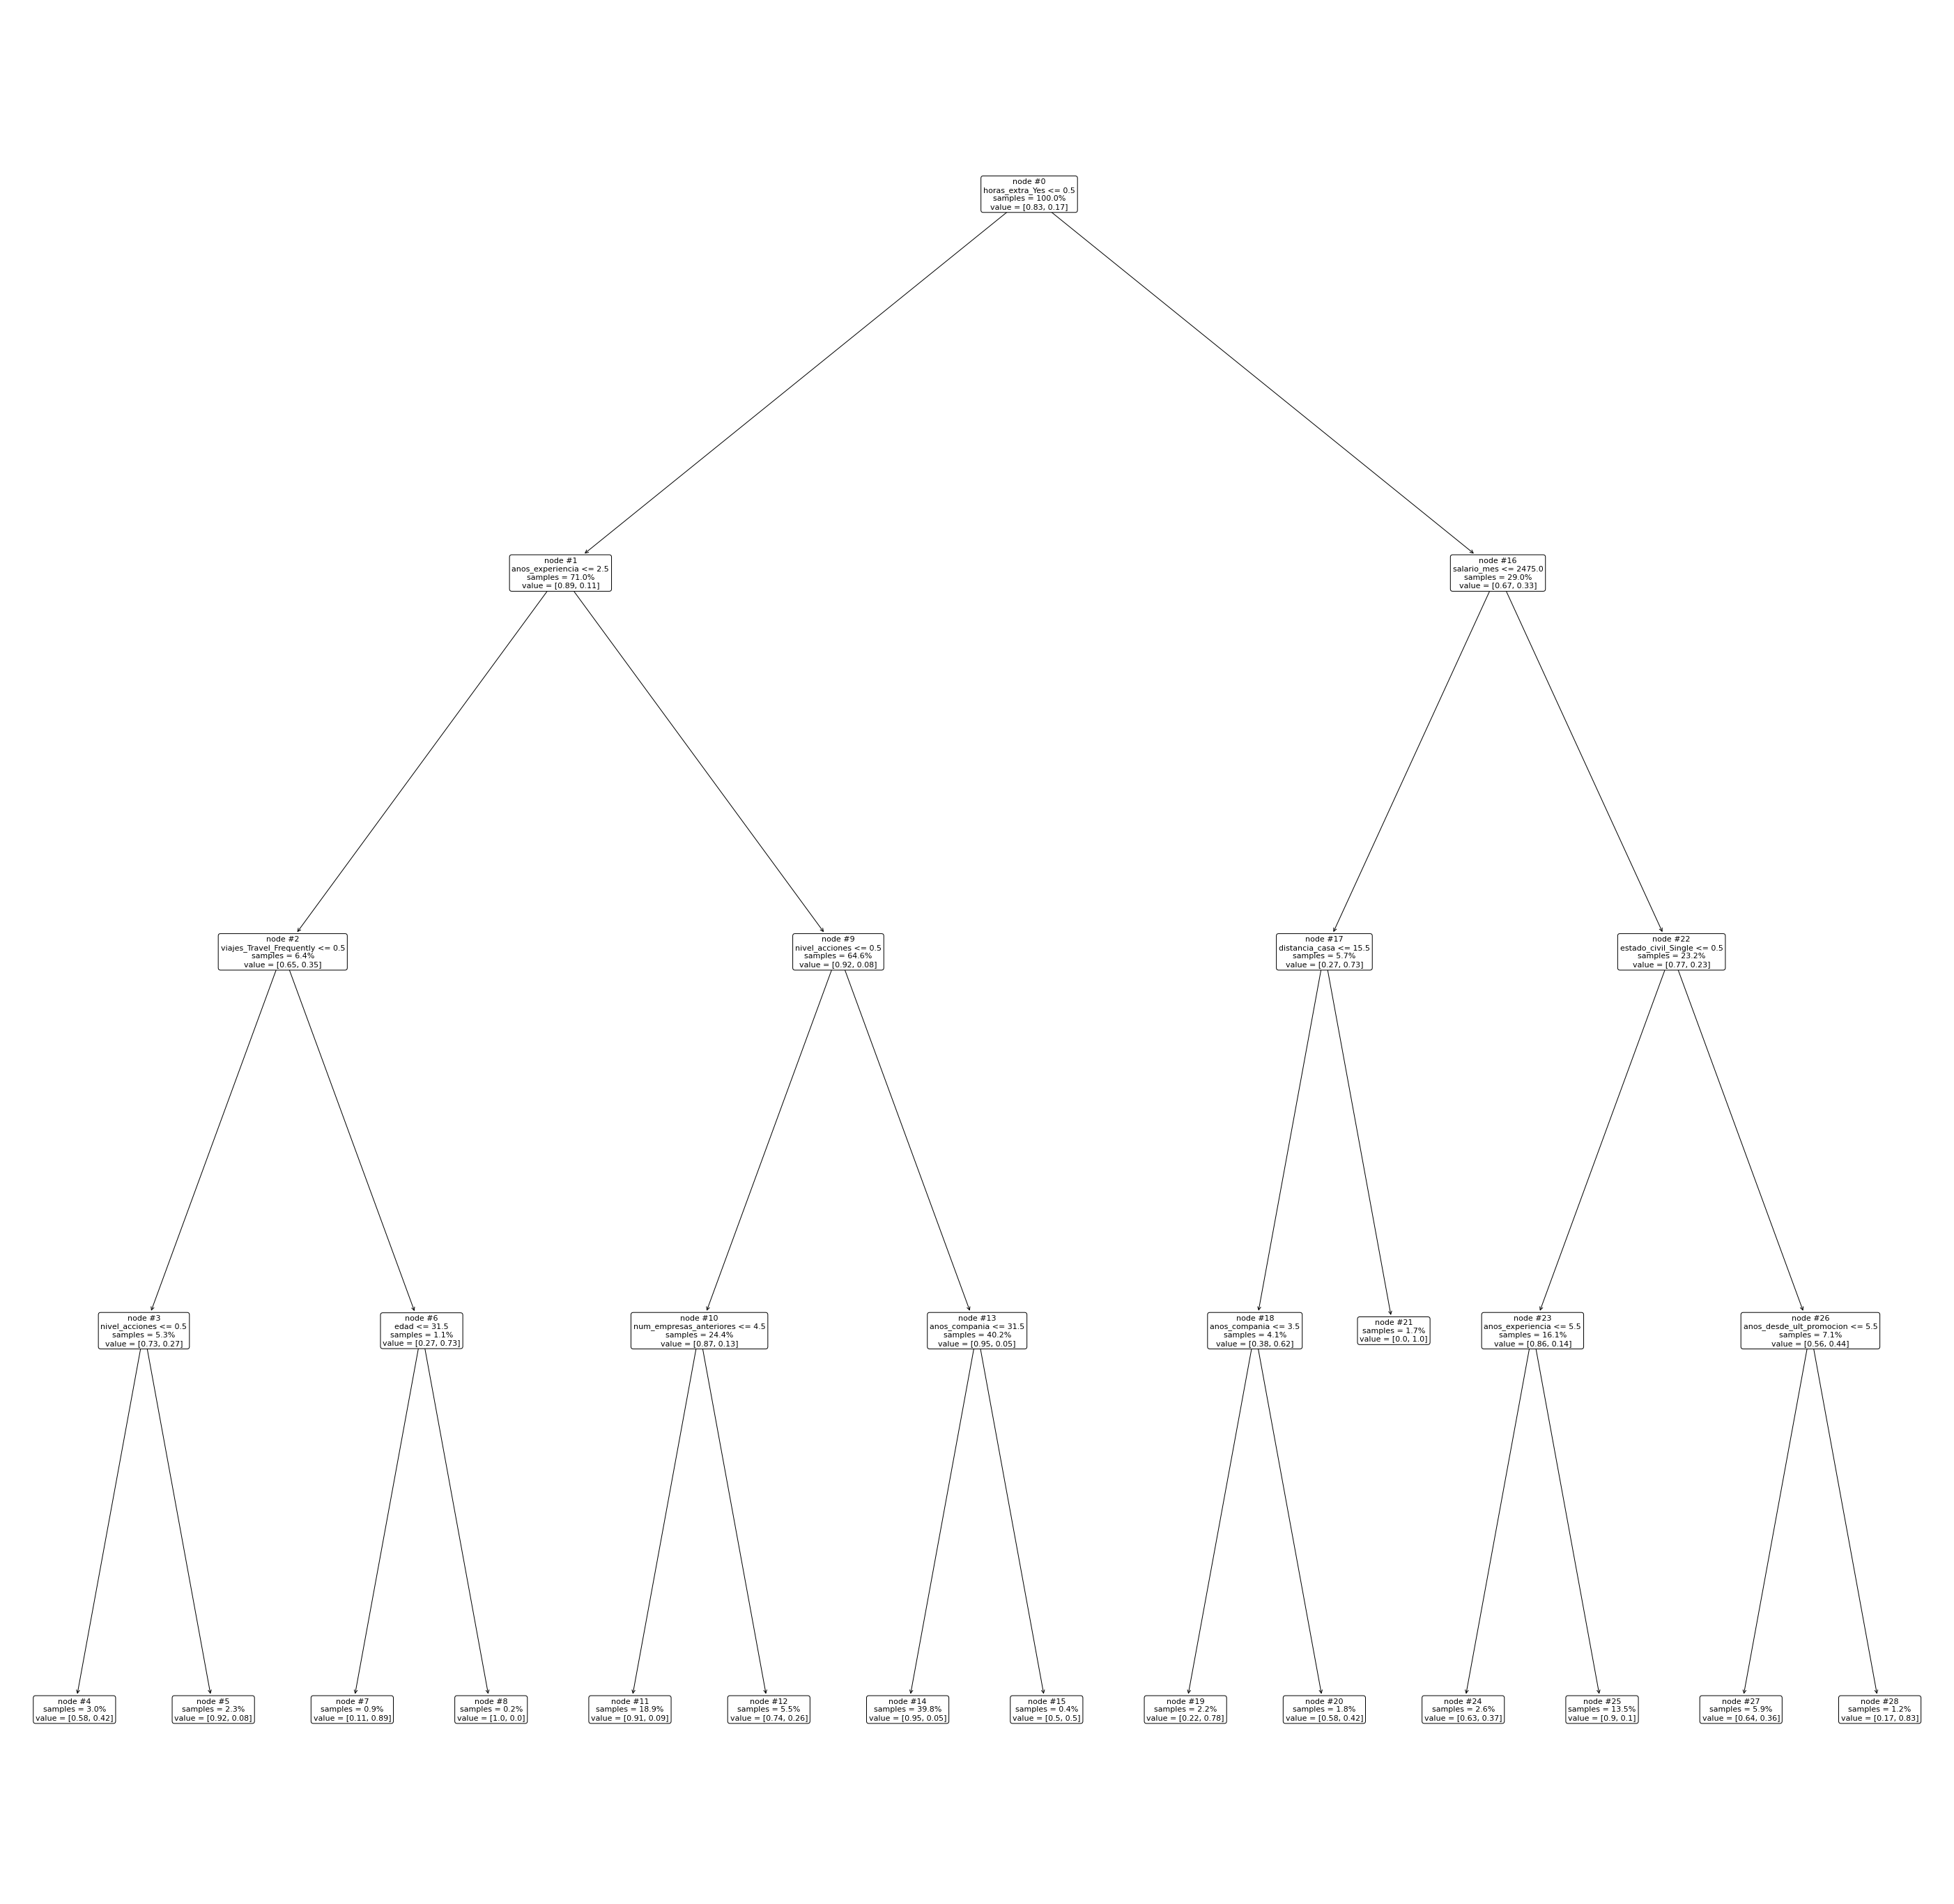

In [63]:
# Diagrama del árbol: para realizar la interpretacion usamos de la librería Sklearn, una clase que se llama plot_tree.
#A continuacion, con el método "figure" definimos el tamaño de la imagen (50,50) y posteriormente establecemos las opciones
#con las cuales queremos que nos genere ese gráfico.
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(tree_decision,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

**Explicación de los resultados:** 

- El **nodo inicial** contiene todos los casos correspondientes a ese 30% de los datos que hemos reservado para la fase de testing (test_X)(samples = 100%). Si reservamos el 30% de 1460 (500 empleados aproximadamente), este 100% que vemos especificado en el nodo inicial represente ese 30%, es decir esos 500 empleados. 

- Luego, se debe observar la penetración inicial de la target, es decir dentro del conjunto de validacion debemos ver cúal es el porcentaje de empleados que han abandonado la empresa (salió el 15%). Este valor es bueno, porque nos da pistas de que este conjunto de test es representativo del conjunto total de empleados, por tanto el valor que dice value en el nodo nos dice que un 85% de 0 (empleados no abandonan la empresa) sobre el 15% de 1 (empleados que si abandonan la empresa).

- Sobre esta información lo que hace el árbol con el primer nodo es identificar la variable y el punto de corte que mejor es capaz de romper ese 15% (que es la variable impacto_abandono) 

- La variable horas_extra, en el primer nodo, se muestra como una condicion. Si dichas horas_extras NO son menores o iguales que el 0.5%, cuando un registro -un empleado- cumpla esa condicion se va a ir siempre por el lado de la izquierda del nodo (o sea que el empleamos no hace horas_extras), mientras que cuando un empleado no cumpla con esa condicion se va a ir por la rama de la derecha, porque significa que si está haciendo horas extra).

- Teniendo en cuenta como se lee el primer nodo, partimos de una penetracion del 15% de abandono. Aquellos que no hacen horas extras esa penetracion baja hacia un 1%, mientras que entre aquellos que si hacen horas extras esa penetracion sube a un 32%.
Hasta aca me quede...

- Pasando al siguiente nodo(parte de la izquierda), vemos que en sample encontramos un valor de 29% (esto significa que el 29% de los empleados hacen horas extra, por ende cumplen la condicion del primer nodo), de ese 29% de los empleados, el 29% se han ido, lo cual nos da una penetracion de abandono del 29% en ese grupo. Vemos además en este nodo, dentro de los que hacen horas extra, la variable que encontró el arbol que mejor discrimina (salrio_mes) y el criterio que encontró es que ese salario_mes sea menor o igual a 3745.0 (Esto significa que si se cumple ese criterio irá por la izquierda - indicando que el salario por debajo de ese valor corresponde a un salario bajo dentro de la empresa y no tiene el empleado un perfil alto de cargo para dicho sueldo), entonces si el empleado tiene un sueldo inferior o igual a 3745.0 bajamos hacia la izquierda y vemos que la probabilidad de que ese empleado abandone la empresa de un 29% pasa a un 54%. Mientras que si el salario es mayor o igual 3745.0, esto indica una posicion superior y con mayor sueldo entendiendo de esta manera que del 29% de probabilidades que teniamos de que esos empleados se vayan, desciende hacia la derecha y encontramos una nueva probabilidad de abandono de 16%.

- HASTA ACA, vamos viendo que: los que tienen mayor probabilidades de abandonar la empresa son empleados que trabajan horas extras y tienen un cargo que se corresponde con un sueldo inferior o igual a 3745.0. *

- Continuamos analizando: al descender, por el nodo de la izquierda encontramos dos nodos. Uno correspondiente al puesto (research_scientist). Si la condicion se cumple ese criterio irá por la izquierda, es decir si los empleados trabajan en ese puesto (research_scientist) pasamos de un 54% de probabilidades de que se vaya el empleado, a un 73% de probabilidades. Mientras que si, el empleado no tiene ese puesto y encontramos un valor superior a ese 0.5% encontramos que de ese 54% bajamos a un 35% de probabilidades de que ese empleado se vaya de la empresa.

- **HASTA ACA: vamos viendo que: los que tienen mayor probabilidades de abandonar la empresa son empleados que trabajan horas extras y tienen un cargo que se corresponde con un sueldo inferior o igual a 3745.0 y pertenecen al puesto de research_scientist(investigador cienti

- Las ultimos cajas son los nodos terminales podemos ir identificando o buscando aquellos probabilidades que sean mayores (la de 100% 0-1), 67 %, etc. Podriamos ir tirando para arriba e ir identificando el perdil que nos da ese nivel de probabilidades.



## Importancia de las variables.

El codigo a continuacion nos va a calcular (a nivel macro) sobre el total del modelo que hemos construido cuales son las variables que han resultado mas interesantes. Vemos en el resultado de la ejecucion, a todas las variables pero muchas de ellas con importancia 0, es decir la gran mayoria de las variables que estamos usando en el estudio NO son importantes para que el empleado se vayan. Ademas, el modelo nos permite poner en foco las 12 variables que parecen ser relevantes para la fuga, incluso estas variables estan divididas segun su importancia (y vemos que son 3 las mas importantes). Las mas importantes a nivel global para nuestros empleados es: el nivel laboral, el estado civil(soltero) y que haga horas extras. Sobre estas variables podriamos empezar a trabajar en la toma de decisiones.

**TEC**: las variables que no nos dan relevancia para tec la fuga de empleados podemos descartarlas asi no se pierde tiempo trabajando en ellas.

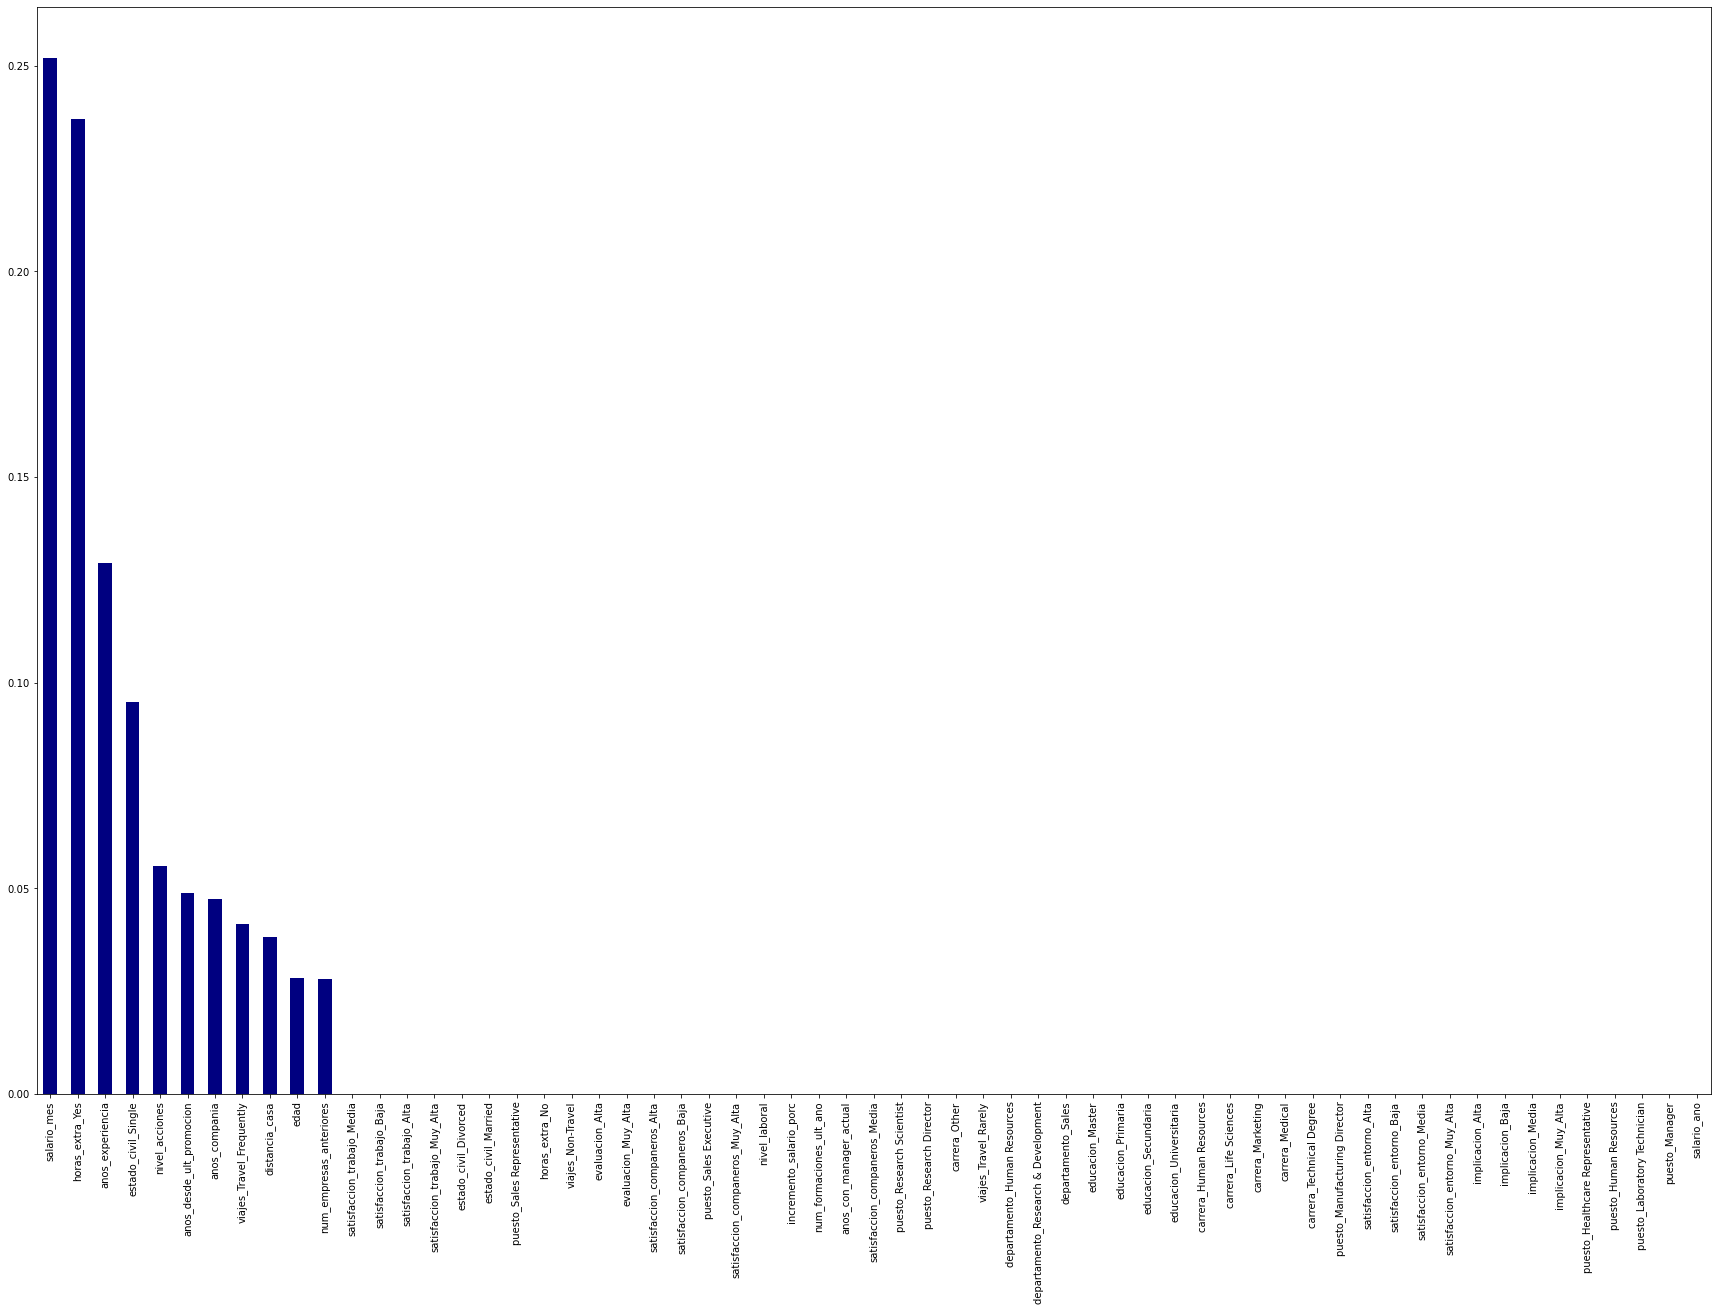

In [76]:
pd.Series(tree_decision.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20), color = 'navy');

**Observaciones:** variables más importantes de acuerdo al modelo: salario_mes, horas_extra_Yes, anos_experiencia y estado_civil_Single

## **Explotación y descarga del resultado**

Incorporación del scoring al dataframe principal:

**¿Que hacemos con todo lo que hemos hecho?** Hasta ahora tenemos un modelo que ya hemos interpretado, validado,etc, pero a nivel de predicciones tenemos un vector de numeros... ¿como explotamos este array? = Debemos incorporar esa informacion dentro de nuestro dataset total, por ende *tomamos el dataset total(el inicial/el que tenia las variables todavia sin cambiar para poder explotarlas desde el negocio si quisieramos) y construimos una nueva variables llamada *scoring_abandono, la que vamos a rellenar con la prediccion (tomamos el modelo y le aplicamos el metodo que calcula la probabilidad de la prediccion una vez que hemos eliminado la columna de abandono de nuestro dataframe de machine leaning). Esa prediccion nos va devolver dos cosas: la probabilidad de que el empleado se quede o se vaya. Como me quiero quedar con la probabilidad el empleado se vaya, o sea de que sean 1.

Ejecutamos y al observar podemos ver el dataframe original donde tenemos todas las variables, el identificador del empleado (para poder integrarlo en la BD de la empresa y guardar esa informacion), mas todas las caracteristicas de los mismos. Al final del dataframe podemos ver incorporado el scoring_abandono.

IMPORTANTE: Una vez que tenemos esta informacion (esto el output del modelo) lmetida en los sistemas de informacion de la empresa, la explotacion depende unicamente de nuestra imaginacion.

Ejemplos: ver en codigos siguientes...

In [72]:
data['scoring_abandono'] = tree_decision.predict_proba(data_ml.drop(columns = 'abandono'))[:, 1]
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.360656
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.046341
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.782609
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.100719
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.046341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.046341
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.046341
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.100719


#### **Ejemplo 1 (una explotacion): Sacar los 10 empleados que tienen mayor probabilidad de dejar la empresa (como una accion a corto plazo de identificar los que estan en mas riesgo y empezar a hacer algo sobre ellos)**

Partiendo del dataframe original, usamos el metodo sort_values y pasamos como argumentos, ordenandolos por el scoring_abandono en descendente y tomamos los 10 primeros.
RESULTADO: el modelo nos arroja una probabilidad del 100% respecto al abandono de la empresa.

In [73]:
data.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1905,34,1,Non-Travel,Research & Development,16,Primaria,Technical Degree,Muy_Alta,Baja,1,...,Media,1,5,2,5,3,0,27684,4457.124,1.0
1767,43,1,Travel_Frequently,Research & Development,17,Universitaria,Technical Degree,Alta,Media,1,...,Muy_Alta,1,6,4,1,0,0,29244,4708.284,1.0
394,26,1,Travel_Rarely,Research & Development,16,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,5,2,3,0,2,28476,4584.636,1.0
952,25,1,Travel_Rarely,Sales,19,Secundaria,Marketing,Alta,Media,1,...,Alta,3,1,2,1,0,0,28956,4661.916,1.0
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,1.0
315,29,1,Travel_Rarely,Research & Development,18,Secundaria,Medical,Alta,Media,1,...,Alta,0,4,3,4,0,1,28668,4615.548,1.0
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,Media,0,6,4,4,0,3,24336,3918.096,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0


#### **Ejemplo 2(explotacion 2): riesgo de dejar la empresa por puesto de trabajo**

Partiendo del dataframe original usamos el metodo boxplot, seleccionamos coo argumento la prediccion que hace el modelo (colum="scoring_abandono"), la dividimos por puesto de trabajo (by="puesto")(puede ser dividido por cualquier variable: manager, territorial, etc).
En el resultado vemos un grafico de caja y bigotes que tiene la mediana y los percentiles 75% - 25% por cada uno de los departamentos. (Confirmamos de esta manera que las areas de ventas son las que mas probabilidad global tienen de fuga de sus empleados).

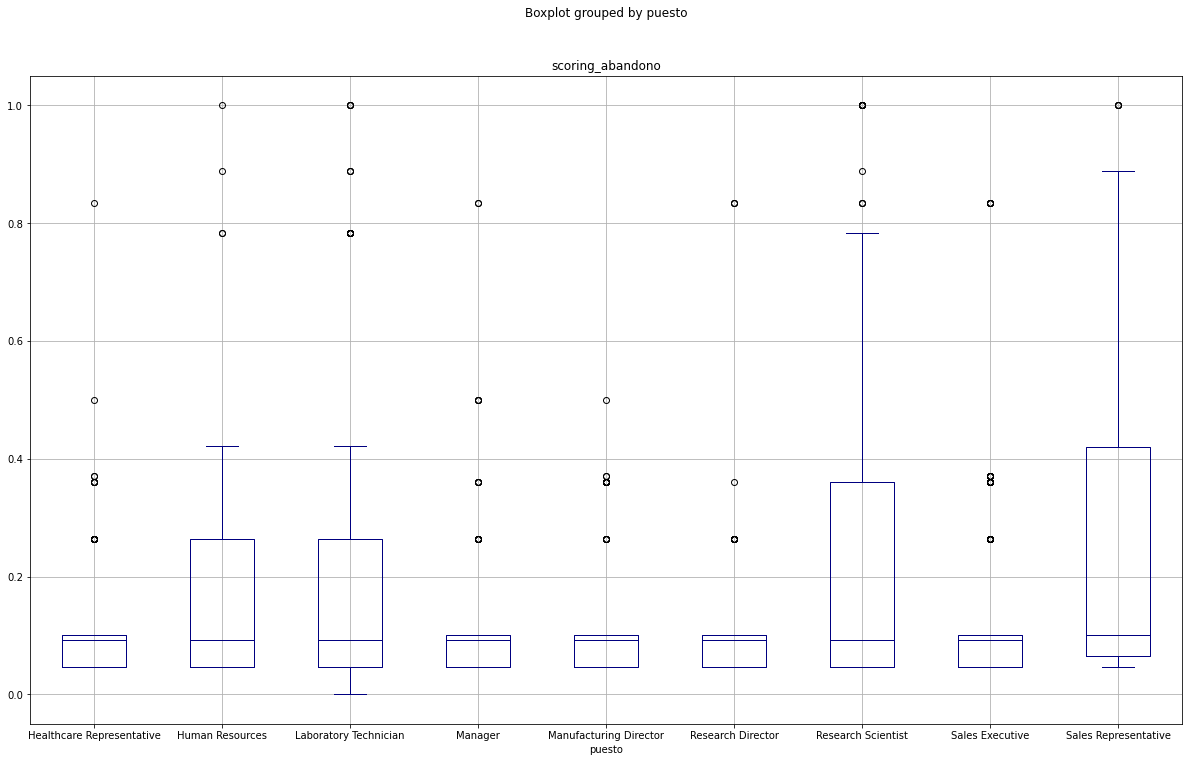

In [75]:
data.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12), color = 'navy');

**¿Cómo guardamos el resultado?**


Primero lo pasamos en un formato de excel y luego lo descargamos en nuestro equipo para poder utilizarlo y realizar las visualizaciones correspondientes y los cuadros de mando.

DESCARGAR EL ARCHIVO (EL DATASET) PARA PODER UTILIZARLO Y DESARROLLAR LA PARTE DE COMUNICACION Y VISUALIZACION EN TABLEAU

In [77]:
pwd


'C:\\Users\\Bailador\\Documents\\Cosas_Daiana\\0000_Experience_1_Semana_como_Data_Sientist\\Hecho en Jupyter Notebook'

In [78]:
data.to_excel('abandono_con_scoring.xlsx', index = False) 